## Removing Stray Magnetic Fields from the KPLO Magnetometer Measurements

In [1]:
"Import Necessary Libraries"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fcwt

#### July 5th to 7th, 2023

In [2]:
"Load KMAG Data"
kmag = pd.read_csv(r'c:\Users\alexp\OneDrive\Documents\GitHub\MAGPRIME\magprime\utility\SPACE_DATA\KPLO\KPLO_KMAG_230705_GSE_1sec.csv')

"Load THEMIS Data"
themis = pd.read_csv(r'c:\Users\alexp\OneDrive\Documents\GitHub\MAGPRIME\magprime\utility\SPACE_DATA\THEMIS\20230705_themis_thb_fgm_fgs_l2.csv')

"Convert THEMIS Data to Numpy Arrays"
Bx_th = themis['bx_gse'].to_numpy(); By_th = themis['by_gse'].to_numpy(); Bz_th = themis['bz_gse'].to_numpy()
B_th = np.array([Bx_th, By_th, Bz_th])

"Convert KPLO Data to Numpy Arrays"
B1_x = kmag['MAG1-X'].to_numpy(); B1_y = kmag['MAG1-Y'].to_numpy(); B1_z = kmag['MAG1-Z'].to_numpy()
B2_x = kmag['MAG2-X'].to_numpy(); B2_y = kmag['MAG2-Y'].to_numpy(); B2_z = kmag['MAG2-Z'].to_numpy()
B3_x = kmag['MAG3-X'].to_numpy(); B3_y = kmag['MAG3-Y'].to_numpy(); B3_z = kmag['MAG3-Z'].to_numpy()
B_3b = np.vstack((B3_x, B3_y, B3_z)); B_3b = np.nan_to_num(B_3b)
B_2b = np.vstack((B2_x, B2_y, B2_z)); B_2b = np.nan_to_num(B_2b)
B_1b = np.vstack((B1_x, B1_y, B1_z)); B_1b = np.nan_to_num(B_1b)
B_kplo = np.array([B_1b, B_2b, B_3b])

"Extract Timestamps"
themis_t = pd.to_datetime(themis['UTC']).to_numpy()
kplo_t = pd.to_datetime(kmag['UTC']).to_numpy()

In [11]:
"Apply WAIC-UP"
from algorithms import WAICUPV2, HOG, UBSS
import importlib
importlib.reload(UBSS)

"Note: WAIC-UP is not designed to work with low-frequency data due to the Cone of Influence (COI). Detrending is necessary to avoid low-frequency artefacts."
UBSS.fs = 1 # Sampling Frequency
UBSS.boom = 0
UBSS.sigma = 1
UBSS.bpo = 1
UBSS.cs_iters = 1
"Clean the data"
UBSS.clusterNSGT(B_kplo[:,2])
print(np.abs([UBSS.clusterCentroids[j] for j in UBSS.clusterCentroids]))
B_WAICUP = UBSS.clean(np.copy(B_kplo[:,2]), triaxial=False)


c:\Users\alexp\anaconda3\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))
c:\Users\alexp\OneDrive\Documents\GitHub\MAGPRIME\magprime\algorithms\UBSS.py:222: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  B = np.vstack((np.hstack(B[i]) for i in range(magnetometers)))


[[1.         1.         1.        ]
 [0.91029539 0.40276757 0.09560644]
 [0.56672432 0.56212615 0.60236013]
 [0.93404374 0.30234341 0.19013349]
 [0.92894606 0.2283616  0.29139354]
 [0.72773757 0.65866757 0.19119378]
 [0.84285847 0.47848735 0.24625081]
 [0.85801563 0.25730457 0.44452619]]


c:\Users\alexp\anaconda3\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))
c:\Users\alexp\OneDrive\Documents\GitHub\MAGPRIME\magprime\algorithms\UBSS.py:222: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  B = np.vstack((np.hstack(B[i]) for i in range(magnetometers)))
c:\Users\alexp\anaconda3\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))
c:\Users\alexp\OneDrive\Documents\GitHub\MAGPRIME\magprime\algorithms\UBSS.py:279: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterable

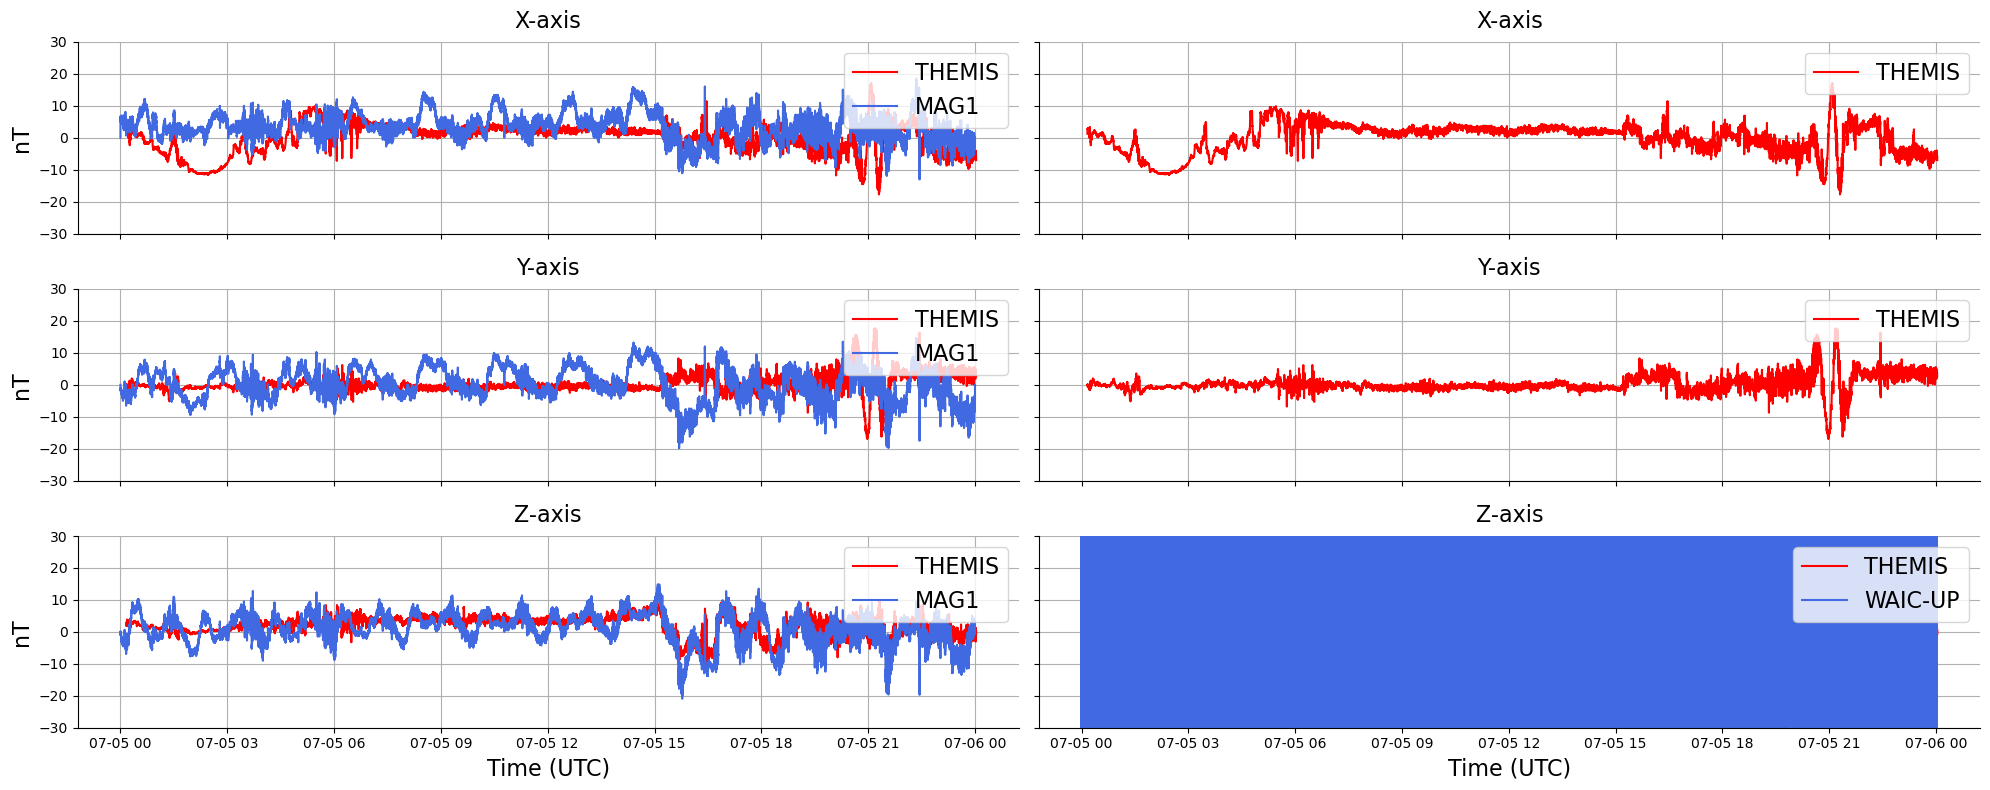

In [12]:
"""Plot Noise and Cleaned Data"""
fig, axs = plt.subplots(3, 2, figsize=(20, 8), sharex=True, sharey=True)

# Plotting
start = 0; end = -1; t_start = 0; t_end = -1


# Overplotting THEMIS data
axs[0,0].plot(themis_t[t_start:t_end], B_th[0,t_start:t_end], label="THEMIS", color='red')
axs[1,0].plot(themis_t[t_start:t_end], B_th[1,t_start:t_end], label="THEMIS", color='red')
axs[2,0].plot(themis_t[t_start:t_end], B_th[2,t_start:t_end], label="THEMIS", color='red')
axs[0,1].plot(themis_t[t_start:t_end], B_th[0,t_start:t_end], label="THEMIS", color='red')
axs[1,1].plot(themis_t[t_start:t_end], B_th[1,t_start:t_end], label="THEMIS", color='red')
axs[2,1].plot(themis_t[t_start:t_end], B_th[2,t_start:t_end], label="THEMIS", color='red')


axs[0,0].plot(kplo_t[start:end], B_kplo[0,2,start:end], label=f"MAG1", color='royalblue')
axs[1,0].plot(kplo_t[start:end], B_kplo[1,2,start:end], label=f"MAG1", color='royalblue')
axs[2,0].plot(kplo_t[start:end], B_kplo[2,2,start:end], label=f"MAG1", color='royalblue')
#axs[0,1].plot(kplo_t[start:end], B_WAICUP[0,start:end], label=f"WAIC-UP", color='royalblue')
#axs[1,1].plot(kplo_t[start:end], B_WAICUP[1,start:end], label=f"WAIC-UP", color='royalblue')
axs[2,1].plot(kplo_t[start:end], B_WAICUP[start:end], label=f"WAIC-UP", color='royalblue')

# set y-axis limits from -25 to 25 nT
for row in axs:
    for ax in row:
        ax.set_ylim(-30, 30)

# Adding Legends
axs[0,0].legend(loc=1, fontsize=16); axs[0,1].legend(loc=1, fontsize=16); axs[1,0].legend(loc=1, fontsize=16); axs[1,1].legend(loc=1, fontsize=16); axs[2,0].legend(loc=1, fontsize=16); axs[2,1].legend(loc=1, fontsize=16)


# Adding labels
axs[0,0].set_ylabel("nT", fontsize=16); axs[1,0].set_ylabel("nT", fontsize=16); axs[2,0].set_ylabel("nT", fontsize=16); 
axs[2,0].set_xlabel("Time (UTC)", fontsize=16); axs[2,1].set_xlabel("Time (UTC)", fontsize=16)

# Adding titles inside each subplot
axs[0,0].set_title("X-axis", loc='center', pad=10, fontsize=16); axs[0,1].set_title("X-axis", loc='center', pad=10, fontsize=16)
axs[1,0].set_title("Y-axis", loc='center', pad=10, fontsize=16); axs[1,1].set_title("Y-axis", loc='center', pad=10, fontsize=16)
axs[2,0].set_title("Z-axis", loc='center', pad=10, fontsize=16); axs[2,1].set_title("Z-axis", loc='center', pad=10, fontsize=16)

# Improving aesthetics
plt.tight_layout()
for row in axs:
    for ax in row:
        ax.grid(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.show()

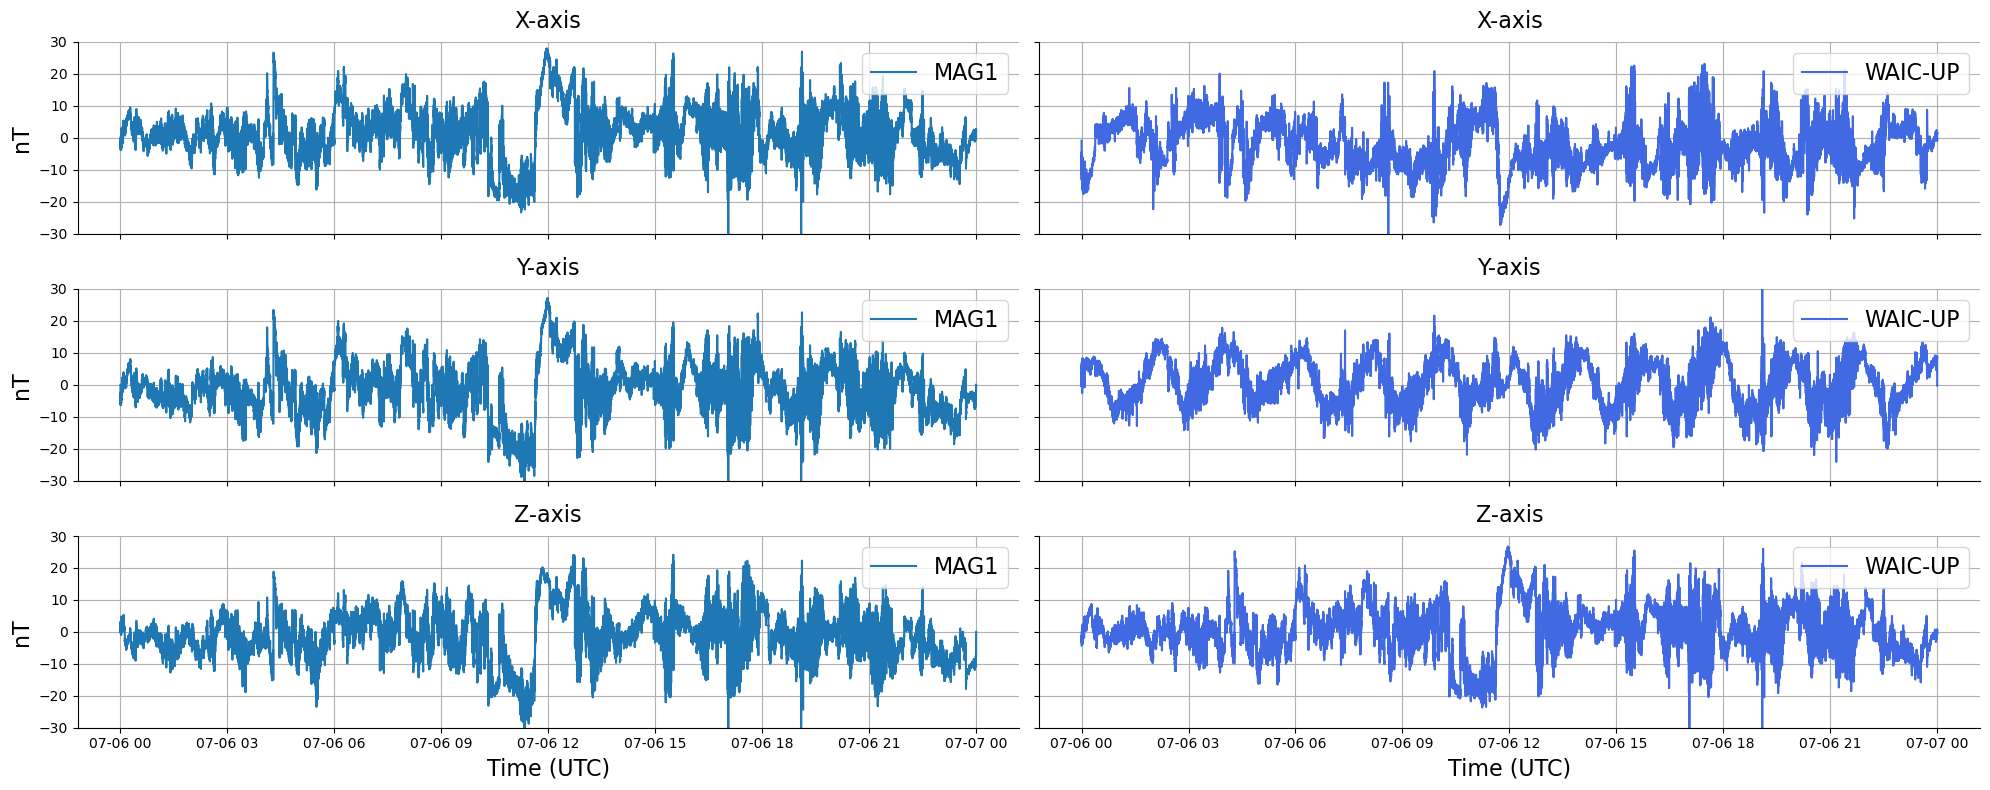

In [24]:
"""Plot Noise and Cleaned Data"""
fig, axs = plt.subplots(3, 2, figsize=(20, 8), sharex=True, sharey=True)

# Plotting
start = 0; end = -1
axs[0,0].plot(kplo_t[start:end], B_kplo[0,2,start:end], label=f"MAG1")
axs[1,0].plot(kplo_t[start:end], B_kplo[1,2,start:end], label=f"MAG1")
axs[2,0].plot(kplo_t[start:end], B_kplo[2,2,start:end], label=f"MAG1")
axs[0,1].plot(kplo_t[start:end], B_WAICUP[0,start:end], label=f"WAIC-UP", color='royalblue')
axs[1,1].plot(kplo_t[start:end], B_WAICUP[1,start:end], label=f"WAIC-UP", color='royalblue')
axs[2,1].plot(kplo_t[start:end], B_WAICUP[2,start:end], label=f"WAIC-UP", color='royalblue')
# Adding Legends
axs[0,0].legend(loc=1, fontsize=16); axs[0,1].legend(loc=1, fontsize=16); axs[1,0].legend(loc=1, fontsize=16); axs[1,1].legend(loc=1, fontsize=16); axs[2,0].legend(loc=1, fontsize=16); axs[2,1].legend(loc=1, fontsize=16)


# set y-axis limits from -25 to 25 nT
for row in axs:
    for ax in row:
        ax.set_ylim(-30, 30)

# Adding labels
axs[0,0].set_ylabel("nT", fontsize=16); axs[1,0].set_ylabel("nT", fontsize=16); axs[2,0].set_ylabel("nT", fontsize=16); 
axs[2,0].set_xlabel("Time (UTC)", fontsize=16); axs[2,1].set_xlabel("Time (UTC)", fontsize=16)

# Adding titles inside each subplot
axs[0,0].set_title("X-axis", loc='center', pad=10, fontsize=16); axs[0,1].set_title("X-axis", loc='center', pad=10, fontsize=16)
axs[1,0].set_title("Y-axis", loc='center', pad=10, fontsize=16); axs[1,1].set_title("Y-axis", loc='center', pad=10, fontsize=16)
axs[2,0].set_title("Z-axis", loc='center', pad=10, fontsize=16); axs[2,1].set_title("Z-axis", loc='center', pad=10, fontsize=16)

# Improving aesthetics
plt.tight_layout()
for row in axs:
    for ax in row:
        ax.grid(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

plt.show()

In [28]:

from scipy import signal
B_th_resampled = np.array([signal.resample(B_th[i], B_WAICUP.shape[-1]) for i in range(3)])
themis_t_resampled = signal.resample(themis_t, B_WAICUP.shape[-1])


In [36]:
"Find Correlation of WAIC-UP"
from scipy.stats import pearsonr
B_noise = B_kplo[2]-B_kplo[0]

correlation = [pearsonr(B_noise[i], B_WAICUP[i])[0] for i in range(3)]
print(correlation)

correlation = [pearsonr(B_noise[i], B_kplo[0,i])[0] for i in range(3)]
print(correlation)

correlation = [pearsonr(B_th_resampled[i], B_kplo[0,i,:])[0] for i in range(3)]
print(correlation)

[-0.1437215176015062, -0.26717796685810136, -0.1572271283405013]
[-0.3983083576319776, -0.8479434447269508, -0.3634025452645215]
[-0.06885654096501313, -0.15298157442582216, 0.07378017299827608]


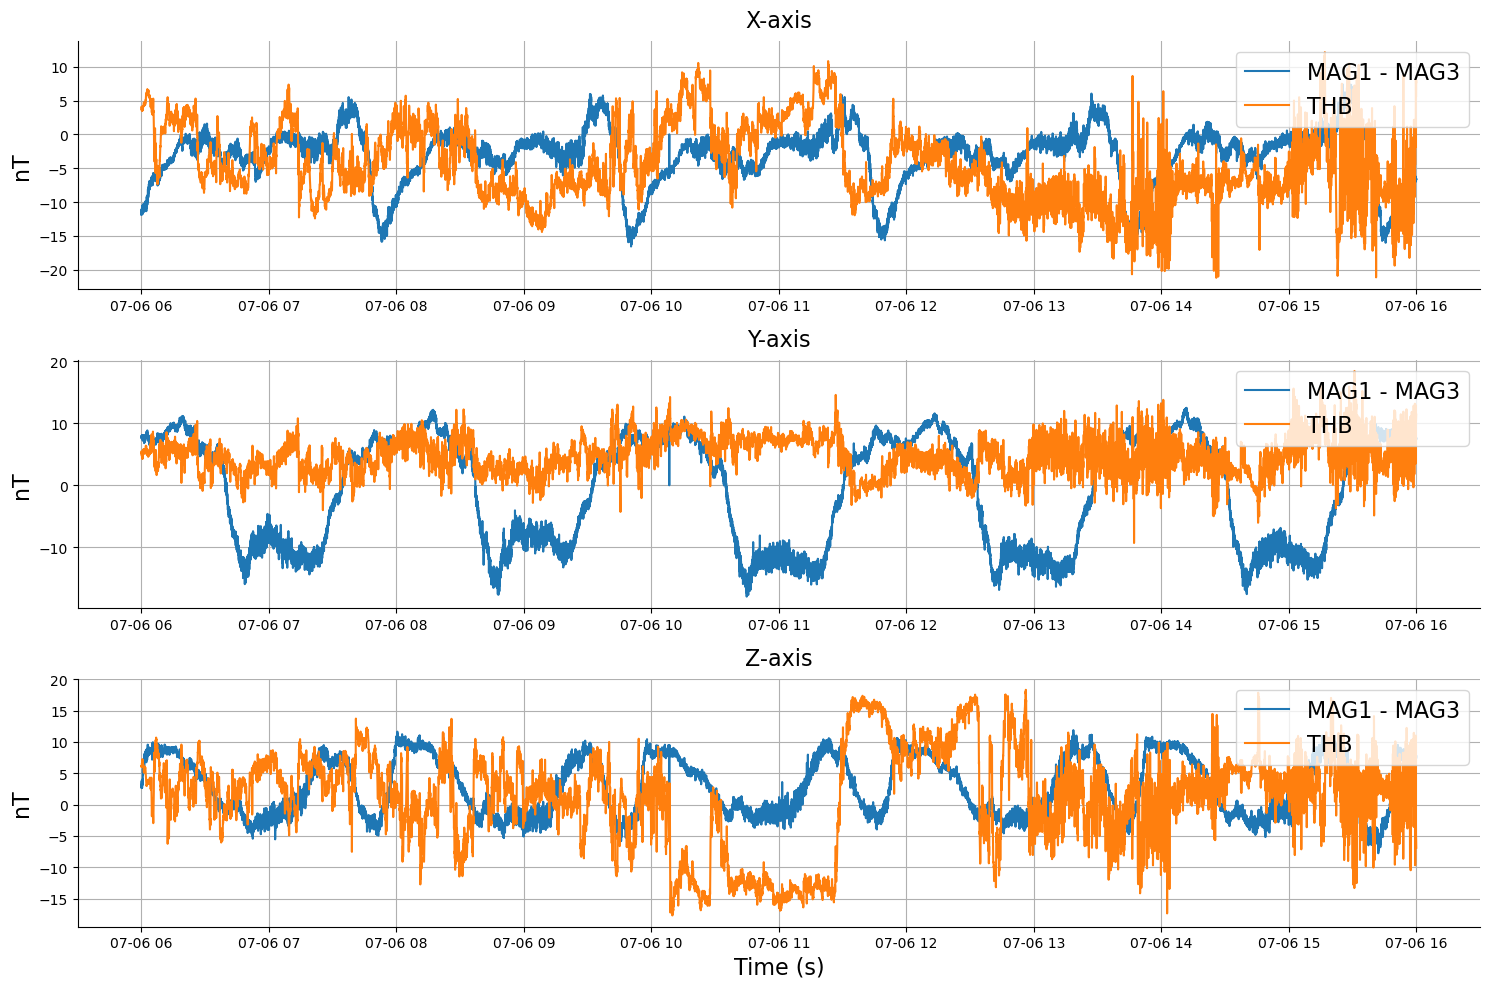

In [83]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
start = 30*3600; end = 40*3600

# Plotting
axs[0].plot(kplo_t[start:end], B_kplo[0,0,start:end]-B_kplo[2,0,start:end], label=f"MAG1 - MAG3")
axs[0].plot(kplo_t[start:end], B_th_resampled[0,start:end], label=f"THB")
axs[1].plot(kplo_t[start:end], B_kplo[0,1,start:end]-B_kplo[2,1,start:end], label=f"MAG1 - MAG3")
axs[1].plot(kplo_t[start:end], B_th_resampled[1,start:end], label=f"THB")
axs[2].plot(kplo_t[start:end], B_kplo[0,2,start:end]-B_kplo[2,2,start:end], label=f"MAG1 - MAG3")
axs[2].plot(kplo_t[start:end], B_th_resampled[2,start:end], label=f"THB")

# Adding legends
axs[0].legend(loc=1, fontsize=16)
axs[1].legend(loc=1, fontsize=16)
axs[2].legend(loc=1, fontsize=16)

# Adding titles inside each subplot
axs[0].set_title("X-axis", loc='center', pad=10, fontsize=16)
axs[1].set_title("Y-axis", loc='center', pad=10, fontsize=16)
axs[2].set_title("Z-axis", loc='center', pad=10, fontsize=16)

# Adding labels
for ax in axs:
    ax.set_ylabel("nT", fontsize=16)
axs[2].set_xlabel("Time (s)", fontsize=16)

# Improving aesthetics
plt.tight_layout()
for ax in axs:
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [53]:
"Take Continuous Wavelet Transform"
fs_waicup_kplo = 4  # Hz
fs_th = 1  # Hz
f0 = 0.0001*4  # Hz
f1 = 0.25 / 2*4  # Hz

# Plot each signal
start =0# 25 * 3600
end = -1#45 * 3600
t_start = 0# 20801
t_end = -1#37552

# take transform of B_kplo Z-axis
freqs_kplo, out_kplo = fcwt.cwt(B_kplo[2,2,start:end], fs_waicup_kplo, f0, f1, fn=300, scaling='log', nthreads=12)
freqs_kplo = np.flip(freqs_kplo)

# take transform of WAICUP Z-axis
freqs_waicup, out_waicup = fcwt.cwt(B_WAICUP, fs_waicup_kplo, f0, f1, fn=300, scaling='log', nthreads=12)
freqs_waicup = np.flip(freqs_waicup)

# take transform of B_kplo Z-axis
freqs_th, out_th = fcwt.cwt(B_th[2], fs_th, f0, f1, fn=300, scaling='log', nthreads=12)
freqs_th = np.flip(freqs_th)

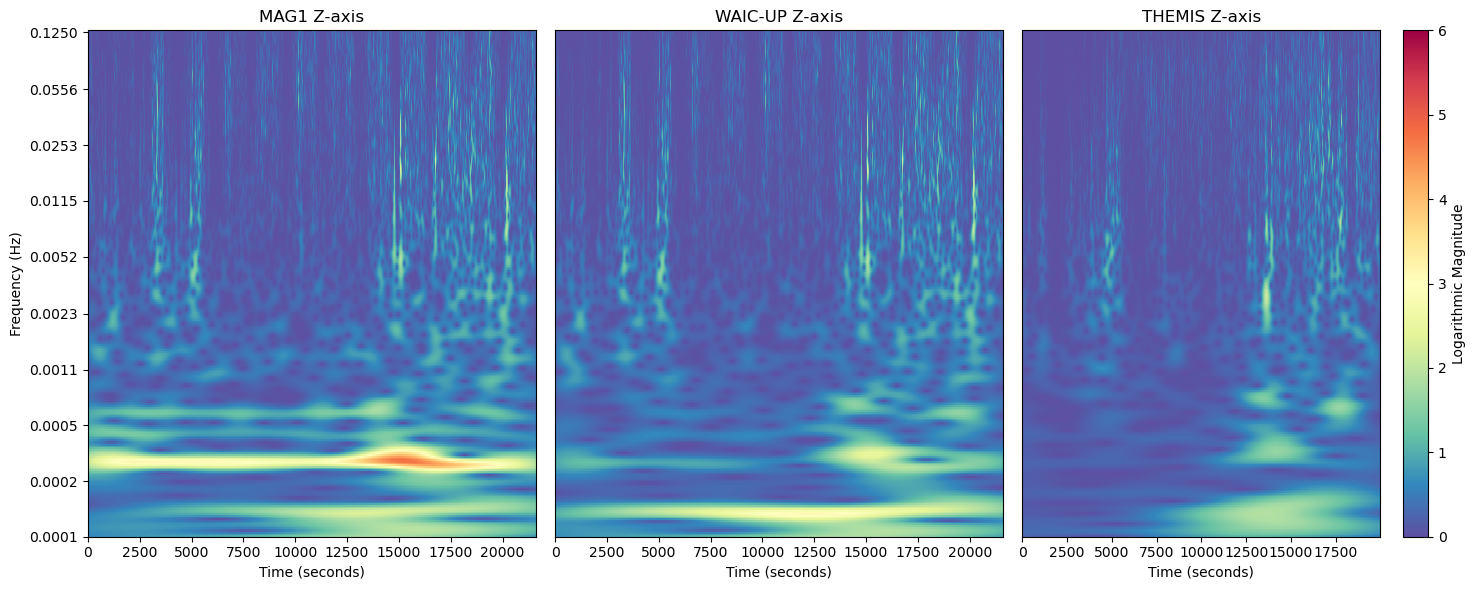

In [54]:

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
extent_kplo = [0, out_kplo.shape[1] / fs_waicup_kplo, 0, out_kplo.shape[0]]
extent_th = [0, out_th.shape[1] / fs_th, 0, out_th.shape[0]]
cax1 = axs[0].imshow(np.abs(out_kplo), aspect='auto', extent=extent_kplo, origin='upper', interpolation='none', cmap='Spectral_r', vmin=0, vmax=6)
cax2 = axs[1].imshow(np.abs(out_waicup), aspect='auto', extent=extent_kplo, origin='upper', interpolation='none', cmap='Spectral_r', vmin=0, vmax=6)
cax3 = axs[2].imshow(np.abs(out_th), aspect='auto', extent=extent_th, origin='upper', interpolation='none', cmap='Spectral_r', vmin=0, vmax=6)

#fig.colorbar(cax1, ax=axs[0], label='Logarithmic Magnitude')
#fig.colorbar(cax2, ax=axs[1], label='Logarithmic Magnitude')
fig.colorbar(cax3, ax=axs[2], label='Logarithmic Magnitude')

yticks_kplo = np.linspace(0, len(freqs_kplo) - 1, 10).astype(int)
yticklabels_kplo = [f"{freqs_kplo[i]/4:.4f}" for i in yticks_kplo]

axs[0].set_yticks(yticks_kplo)
axs[0].set_yticklabels(yticklabels_kplo)
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_title("MAG1 Z-axis")

# TURN OFF YTICKS FOR AXS[1] AND AXS[2]
axs[1].set_yticks([])
axs[1].set_xlabel('Time (seconds)')
axs[1].set_title("WAIC-UP Z-axis")
axs[2].set_yticks([])
axs[2].set_xlabel('Time (seconds)')
axs[2].set_title("THEMIS Z-axis")


plt.tight_layout()
plt.show()


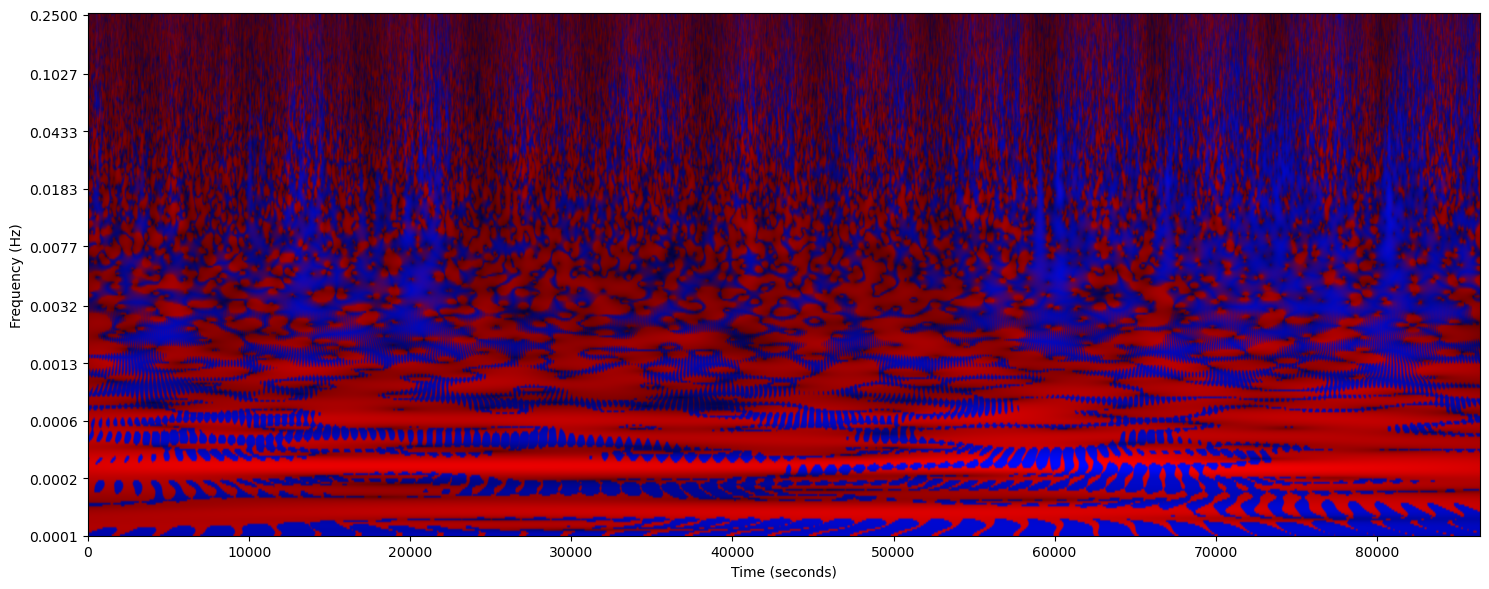

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import fcwt
B = B_kplo 
fs = 1  # Hz
f0 = 0.0001  # Hz
f1 = .25  # Hz


# take transform of B_kplo Z-axis
freqs, out1 = fcwt.cwt(B[0,2], fs, f0, f1, fn=300, scaling='log', nthreads=12)
freqs, out2 = fcwt.cwt(B[2,2], fs, f0, f1, fn=300, scaling='log', nthreads=12)
freqs = np.flip(freqs)

def identify_SSP(B, sspTol=15):
    """Identify Multi Source Points"""
    a = np.real(B)
    b = np.imag(B)
    a_dot_b = (a * b).sum(axis=0)
    norm_a = np.linalg.norm(a, axis=0)
    norm_a[norm_a == 0] = 1
    norm_b = np.linalg.norm(b, axis=0)
    norm_b[norm_b == 0] = 1
    cos_sim = np.abs(a_dot_b / (norm_a * norm_b))
    MSP_Bools = cos_sim > np.cos(np.deg2rad(sspTol))
    return MSP_Bools

def identify_ASSP(data, sspTol=15):
    """Identify Ambient Single Source Points"""
    a = np.abs(data)
    b = np.ones(data.shape)
    a_dot_b = (a * b).sum(axis=0)
    norm_a = np.linalg.norm(a, axis=0)
    norm_a[norm_a == 0] = 1
    norm_b = np.linalg.norm(b, axis=0)
    norm_b[norm_b == 0] = 1
    cos_sim = np.abs(a_dot_b / (norm_a * norm_b))
    ASSP_Bools = cos_sim >= np.cos(np.deg2rad(sspTol))
    return ASSP_Bools

# Assume out is your wavelet transform data
out = np.array([out1, out2])
n_sensors, n_scales, n_samples = out.shape
w_flattened = out.reshape(n_sensors, n_scales * n_samples)

SSP_Bools = identify_SSP(w_flattened, sspTol=25)
ASSP_Bools = identify_ASSP(w_flattened, sspTol=25)

# Initialize hue array
hue = np.zeros(w_flattened.shape[-1])
hue[~ASSP_Bools | ~SSP_Bools] = 0.0  # Red for MSP
#hue[ASSP_Bools] = 0.33  # Green for ASSP
hue[SSP_Bools] = 0.66  # Blue for SSP

# Get the magnitude of out1 for intensity
intensity = np.abs(out2)
intensity = (intensity - intensity.min()) / (intensity.max() - intensity.min())
intensity = intensity**(.2)

# Create HSV image
hsv_image = np.zeros((out1.shape[0], out1.shape[1], 3))
hsv_image[..., 0] = hue.reshape(out1.shape)  # Hue
hsv_image[..., 1] = 1.0  # Full saturation
hsv_image[..., 2] = intensity  # Value

# Convert HSV to RGB
rgb_image = hsv_to_rgb(hsv_image)

# Plot the result with the custom colormap
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
extent = [0, out1.shape[1] / fs, 0, out1.shape[0]]
caxs = axs.imshow(rgb_image, aspect='auto', extent=extent, origin='upper', interpolation='gaussian')

# Adjust yticks and labels
yticks = np.linspace(0, len(freqs) - 1, 10).astype(int)
yticklabels = [f"{freqs[i]:.4f}" for i in yticks]
axs.set_yticks(yticks)
axs.set_yticklabels(yticklabels)
axs.set_xlabel('Time (seconds)')
axs.set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
 